In [29]:
# Import libs
from pymongo import MongoClient
from pymongo.errors import PyMongoError
from collections import Counter
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import json
import requests
import os

In [30]:
ip = "parivision.heuzef.com"
port = "27017"
username = os.getenv('MONGO_INITDB_ROOT_USERNAME')
password = os.getenv('MONGO_INITDB_ROOT_PASSWORD')

uri = "mongodb://"+username+":"+password+"@"+ip+":"+port

In [31]:
try:
    client = MongoClient(uri)
    client.admin.command('ping')
    print("Connexion réussie !")
    print(client.list_database_names())

except PyMongoError as e:
    print(f"Erreur d'authentification : {e}")

Connexion réussie !
['admin', 'config', 'local', 'parivision']


In [32]:
# Create DataBase
db = client["parivision"]

# Create collections
parivision_raw = db["parivision_raw"]
parivision_processed = db["parivision_processed"]

print(db)
print("Collections :\n")
for collection in db.list_collection_names():
    print(collection)

Database(MongoClient(host=['parivision.heuzef.com:27017'], document_class=dict, tz_aware=False, connect=True), 'parivision')
Collections :

parivision_raw


In [33]:
parivision_raw.find_one()

{'_id': ObjectId('67eaeeb47a947be880f049b5'),
 'Game ID': '0029700427',
 'Game Event ID': '389',
 'Player ID': '100',
 'Player Name': 'Tim Legler',
 'Team ID': '1610612764',
 'Team Name': 'Washington Wizards',
 'Period': '4',
 'Minutes Remaining': '11',
 'Seconds Remaining': '22',
 'Action Type': 'Jump Shot',
 'Shot Type': '2PT Field Goal',
 'Shot Zone Basic': 'Mid-Range',
 'Shot Zone Area': 'Right Side(R)',
 'Shot Zone Range': '8-16 ft.',
 'Shot Distance': '15',
 'X Location': '117',
 'Y Location': '109',
 'Shot Made Flag': '1',
 'Game Date': '19980102',
 'Home Team': 'WAS',
 'Away Team': 'IND',
 'Season Type': 'Regular Season'}

In [34]:
parivision_raw.count_documents({})

1000

In [35]:
parivision_processed.count_documents({})

0

Distribution of (X Location, Y Location) pairs:
  (117, 109): 1
  (143, 25): 1
  (-87, 55): 1
  (-1, 53): 1
  (89, 113): 1
  (-231, 42): 1
  (-166, 59): 1
  (23, 36): 1
  (123, -18): 1
  (-130, 31): 1
  (229, 12): 1
  (81, 68): 1
  (102, -3): 1
  (220, 119): 1
  (-10, 25): 1
  (-175, 36): 1
  (239, 59): 1
  (-212, 151): 1
  (85, 239): 1
  (-132, -3): 1
  (76, 72): 1
  (0, 0): 377
  (-113, 119): 1
  (-31, 70): 1
  (117, 115): 1
  (151, 158): 1
  (171, 274): 1
  (-151, 203): 1
  (126, 166): 1
  (194, -3): 1
  (-55, 8): 1
  (-126, 25): 1
  (8, 59): 1
  (104, 222): 3
  (-184, 53): 1
  (91, 151): 1
  (8, 248): 1
  (147, 16): 1
  (-190, 57): 1
  (18, 205): 1
  (1, 96): 1
  (190, 57): 1
  (-117, 33): 1
  (14, 63): 1
  (-23, 190): 1
  (145, 104): 1
  (53, 59): 1
  (136, 171): 1
  (-94, 96): 1
  (0, 91): 1
  (0, 38): 1
  (121, 27): 1
  (128, 93): 1
  (-10, 96): 1
  (68, 3): 1
  (-222, 121): 1
  (-156, 0): 1
  (136, 113): 1
  (85, 224): 1
  (61, 66): 1
  (-128, 205): 1
  (-115, 160): 1
  (-194, 

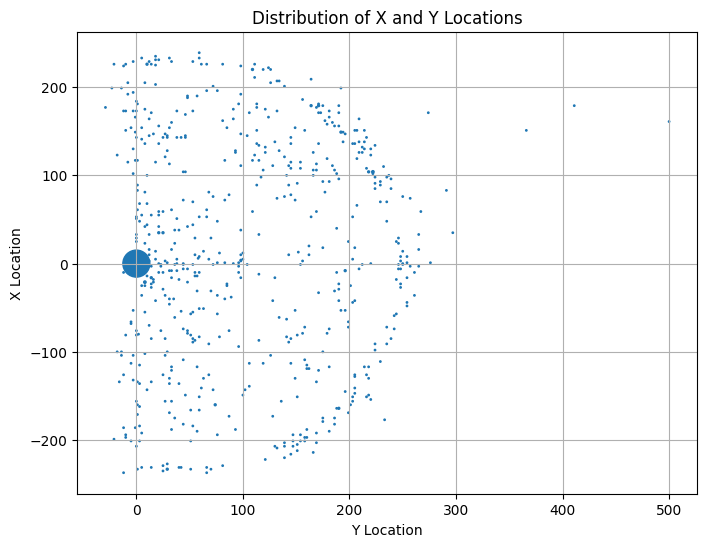

In [44]:
def analyze_xy_distribution(collection):
    """
    Extracts "X Location" and "Y Location" values from a MongoDB collection and displays their distribution.

    Args:
        collection: The pymongo collection object.
    """
    try:
        # 2. Extract "X Location" and "Y Location" Values
        xy_locations = []
        for document in collection.find({}, {"X Location": 1, "Y Location": 1, "_id": 0}):
            if "X Location" in document and "Y Location" in document:
                xy_locations.append((int(document["X Location"]), int(document["Y Location"])))

        # 3. Analyze Distribution
        location_counts = Counter(xy_locations)

        # 4. Display Distribution
        print("Distribution of (X Location, Y Location) pairs:")
        for (x, y), count in location_counts.items():
            print(f"  ({x}, {y}): {count}")

        # 5. Optional: Visualize with a scatter plot
        if len(location_counts) > 0:
            x_values = [x for (x, y) in location_counts.keys()]
            y_values = [y for (x, y) in location_counts.keys()]
            counts = list(location_counts.values())

            plt.figure(figsize=(8, 6))
            plt.scatter(y_values, x_values, s=counts)  # Size of dots represents frequency
            plt.xlabel("Y Location")
            plt.ylabel("X Location")
            plt.title("Distribution of X and Y Locations")
            plt.grid(True)
            plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

    return x_values, y_values

x_values, y_values = analyze_xy_distribution(parivision_raw)


In [48]:
import pandas as pd

def display_xy_statistics(x_values, y_values):
    """
    Displays descriptive statistics for x_values and y_values in a Pandas DataFrame.

    Args:
        x_values (list): A list of x-values.
        y_values (list): A list of y-values.
    """
    try:
        # Check if the lists have the same length
        if len(x_values) != len(y_values):
            raise ValueError("x_values and y_values must have the same length.")

        # 2. Create a DataFrame
        data = {'X Location': x_values, 'Y Location': y_values}
        df = pd.DataFrame(data)

        # 3. Display Descriptive Statistics
        print(df.describe())

    except ValueError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

display_xy_statistics(x_values, y_values)

       X Location  Y Location
count  607.000000  607.000000
mean    12.855025  101.747941
std    127.375224   86.684649
min   -237.000000  -29.000000
25%    -85.000000   25.000000
50%      6.000000   85.000000
75%    124.500000  174.000000
max    239.000000  500.000000
